# Homework for module 3

In [41]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

In [42]:
df_raw = pd.read_csv(r"C:\Users\mderkaoui\OneDrive\ml_zoomcamp_dtc\ml_zoomcamp_2024_DTC\Churn_prediction_project\homework\bank+marketing\bank\bank.csv", delimiter =";")

In [43]:
df_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [44]:
#df_small = df_raw[["age", "job", "marital", "education", "balance", "housing", "contact", "day", "month", "duration", "campaign", "pdays", "previous", "poutcome", "y"]]
del df_raw["default"]
del df_raw["loan"]

df_raw.head()

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,1787,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,4789,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,1350,yes,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,1476,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,0,yes,unknown,5,may,226,1,-1,0,unknown,no


In [45]:
df_raw.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

No missing values for the selected features

## Question 1

In [46]:
df_raw["education"].mode()

0    secondary
Name: education, dtype: object

#### Answer 1 : the mode of "education" is secondary

## Question 2

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object
               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000


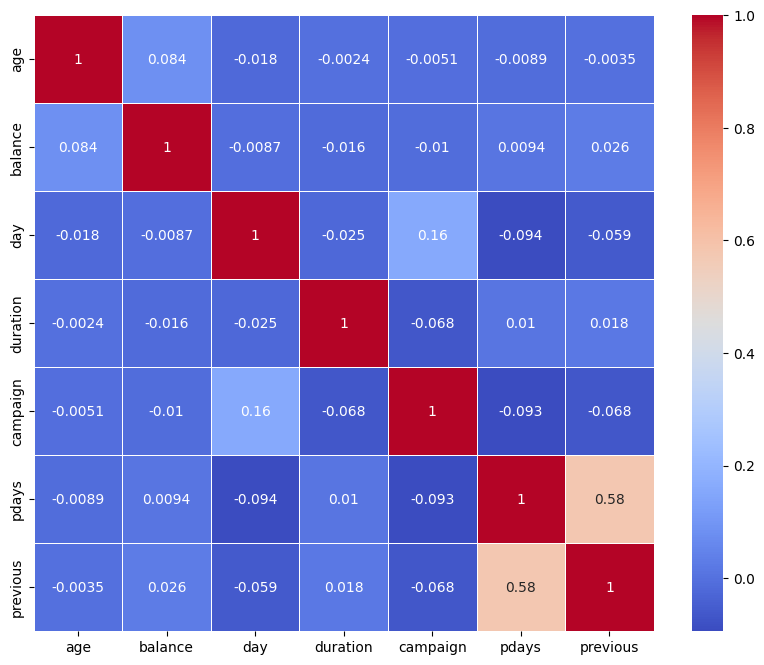

In [47]:
# checking the types of columns
print(df_raw.dtypes)

# selecting only numerical columns 
numerical = np.array(df_raw.columns[(df_raw.dtypes != "object").values])

# calculating the correltion matrix of the numerical features of the df
correlation_matrix = df_raw[numerical].corr()

print(correlation_matrix)

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Show the plot
plt.show()

#### Answer 2 : the two features with the biggest correlation are pdays and previous

## Question 3

In [48]:
# replacing yes/no with 1/0 for "y" variable
df = df_raw.copy()
# print(df["y"].head(20))

df["y"] = (df["y"] == "yes").astype("int")
df["y"].head(20)

# splitting the data
from sklearn.model_selection import train_test_split

df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_train_full, test_size = (0.2/0.8) , random_state = 42)

y_full_train, y_train, y_val, y_test = df_train_full["y"].values , df_train["y"].values, df_val["y"].values, df_test["y"].values

del df_train_full["y"]
del df_train["y"]
del df_val["y"]
del df_test["y"]


In [49]:
from sklearn.metrics import mutual_info_score

In [55]:
categorical = np.array(df_train.columns[(df_train.dtypes == "object").values])
print(categorical)

dict_mi = {feature : round(mutual_info_score(df_train[feature], y_train),2) for feature in categorical}
for feat, value in dict_mi.items():
    print(feat,' : ', value)

['job' 'marital' 'education' 'housing' 'contact' 'month' 'poutcome']
job  :  0.01
marital  :  0.0
education  :  0.0
housing  :  0.01
contact  :  0.01
month  :  0.02
poutcome  :  0.03


#### Answer 3 : poutcome has the biggest mutual information score

## Question 4 :

In [56]:
# One-hot encoding
from sklearn.feature_extraction import DictVectorizer

train_dict = df_train.to_dict(orient = "records")
train_dict[0]

{'age': 41,
 'job': 'management',
 'marital': 'married',
 'education': 'tertiary',
 'balance': 72,
 'housing': 'yes',
 'contact': 'unknown',
 'day': 7,
 'month': 'may',
 'duration': 764,
 'campaign': 3,
 'pdays': -1,
 'previous': 0,
 'poutcome': 'unknown'}

In [65]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dict)
X_train.shape

(2712, 47)

In [ ]:
dv.get_feature_names_out()

In [69]:
# Applying the ogistic regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

#LogisticRegression?

In [92]:
model.fit(X_train, y_train)

dict_val = df_val.to_dict(orient = "records")

X_val = dv.transform(dict_val)

y_pred = model.predict_proba(X_val)[:,1]

print(model.predict_proba(X_val[:5]))

pred = (y_pred > 0.5)

acc_original = round((pred == y_val).mean(),2)

print(acc_original)

[[0.67103109 0.32896891]
 [0.99524829 0.00475171]
 [0.2404187  0.7595813 ]
 [0.57530368 0.42469632]
 [0.98813215 0.01186785]]
0.89


#### Answer 4 : The accuracy of the model on validation dataset is apprx 0.9

In [89]:
# Extra, using desisiontreeclassifier
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
classifier.predict_proba(X_val[:5])

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [90]:
# Extra
classifier.predict(X_val[:5])

array([0, 0, 0, 0, 0])

## Question 5 :

In [81]:
# first, the list of all features
base = ["age", "job", "marital", "education", "balance", "housing", "contact", 
        "day", "month", "duration", "campaign", "pdays", "previous", "poutcome"]

# for each feature excluded, we need to get the X_train with the rest features
dict_accu = {}
dict_diff_acc = {}
min_diff_acc = None
min_i = None

for ind, f in enumerate(base) :
    base_lessOne = [feat for feat in base if feat != f]
    #print(f)
    #print(base_lessOne)
    train_dict = df_train[base_lessOne].to_dict(orient = "records")
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

    model.fit(X_train, y_train)

    dict_val = df_val[base_lessOne].to_dict(orient = "records")

    X_val = dv.transform(dict_val)

    y_pred = model.predict_proba(X_val)[:,1]

    pred = (y_pred > 0.5)

    acc_one = round((pred == y_val).mean(),3)

    dict_accu[f] = acc_one
    dict_diff_acc[f] = acc_original - acc_one

    if min_diff_acc == None :
        min_diff_acc = abs(acc_original - acc_one)
        min_i = ind
    
    if min_diff_acc > abs(acc_original - acc_one):
        min_diff_acc = abs(acc_original - acc_one)
        min_i = ind

print(dict_accu)
print(dict_diff_acc)
print(min_diff_acc)
print(base[min_i])


{'age': 0.887, 'job': 0.893, 'marital': 0.89, 'education': 0.889, 'balance': 0.886, 'housing': 0.887, 'contact': 0.886, 'day': 0.887, 'month': 0.886, 'duration': 0.875, 'campaign': 0.888, 'pdays': 0.888, 'previous': 0.888, 'poutcome': 0.879}
{'age': 0.0030000000000000027, 'job': -0.0030000000000000027, 'marital': 0.0, 'education': 0.0010000000000000009, 'balance': 0.0040000000000000036, 'housing': 0.0030000000000000027, 'contact': 0.0040000000000000036, 'day': 0.0030000000000000027, 'month': 0.0040000000000000036, 'duration': 0.015000000000000013, 'campaign': 0.0020000000000000018, 'pdays': 0.0020000000000000018, 'previous': 0.0020000000000000018, 'poutcome': 0.01100000000000001}
0.0
marital


#### Answer 5 : the feature with the smallest difference (equals to 0) from the list is marital

## Question 6 :

In [85]:
C_values = [0.000001, 0.01, 0.1, 1, 10]
max_acc = 0
c_best = None
for c in C_values:
    train_dict = df_train.to_dict(orient = "records")
    
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=float(c), max_iter=1000, random_state=42)

    model.fit(X_train, y_train)

    dict_val = df_val.to_dict(orient = "records")

    X_val = dv.transform(dict_val)

    y_pred = model.predict_proba(X_val)[:,1]

    pred = (y_pred > 0.5)

    acc_one = round((pred == y_val).mean(),3)

    if acc_one > max_acc :
        max_acc = acc_one
        c_best = c
    print(f"accuracy {acc_one} is obtained with the C value of {c}")

print(f"The maximum accuracy {max_acc} is obtained with the C value of {c_best}")

accuracy 0.872 is obtained with the C value of 1e-06
accuracy 0.876 is obtained with the C value of 0.01
accuracy 0.885 is obtained with the C value of 0.1
accuracy 0.888 is obtained with the C value of 1
accuracy 0.887 is obtained with the C value of 10
The maximum accuracy 0.888 is obtained with the C value of 1


NB : I had to approximate 0 to something >0 because 0 means infinite regularization.

#### Answer 6 : the C value that gives the best accuracy is 1, for an accuracy score of 0.888